In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [111]:
data = pd.read_csv('Train.csv')

# Replace column name 'Reached.on.Time_Y.N' with 'on_time' for easier data manipulatiuon

data['on_time'] = data['Reached.on.Time_Y.N']
data = data.drop('Reached.on.Time_Y.N', axis = 1) 


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  on_time              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


We need to have numeric values isntead of string values for ML models. Thus why, we are changing them to numeric values.

In [112]:
title_mapping_ms = {'Flight':1, 'Road' : 2, 'Ship' : 3}
data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map(title_mapping_ms)

In [113]:
title_mapping_wb = {'A':1, 'B' : 2, 'C' : 3, 'D':4}
data['Warehouse_block'] = data['Warehouse_block'].map(title_mapping_wb)

In [114]:
data['Warehouse_block'].fillna(0, inplace= True)

In [115]:
title_mapping_pi = {'low':1, 'medium' : 2, 'high' : 3}
data['Product_importance'] = data['Product_importance'].map(title_mapping_pi)

In [116]:
title_mapping_g = {'M':1, 'F' : 2}
data['Gender'] = data['Gender'].map(title_mapping_g)
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
0,1,4.0,1,4,2,177,3,1,2,44,1233,1
1,2,0.0,1,4,5,216,2,1,1,59,3088,1
2,3,1.0,1,2,2,183,4,1,1,48,3374,1
3,4,2.0,1,3,3,176,4,2,1,10,1177,1
4,5,3.0,1,2,2,184,3,2,2,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,1.0,3,4,1,252,5,2,2,1,1538,1
10995,10996,2.0,3,4,1,232,5,2,2,6,1247,0
10996,10997,3.0,3,5,4,242,5,1,2,4,1155,0
10997,10998,0.0,3,5,2,223,6,2,1,2,1210,0


Now we can see that all data has been altered to numeric. We can proceed with Training/Testing Split. And Data Exploration

In [117]:
# Split the data into training and testing sets
train=data.sample(frac=0.8,random_state=69)
test=data.drop(train.index)

<Axes: >

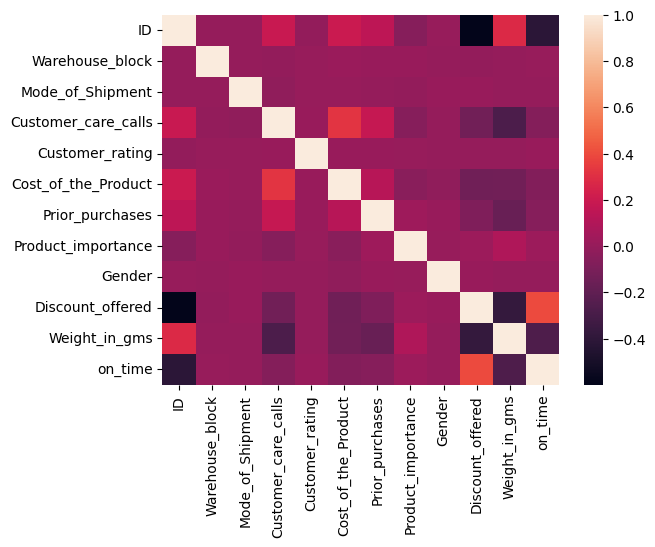

In [118]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [119]:
def bar_chart(data, feature): 
    on_time = data[data['on_time']==1][feature].value_counts()
    not_on_time = data[data['on_time']==0][feature].value_counts()
    df = pd.DataFrame([on_time, not_on_time])
    df.index = ['on_time', 'not_on_time'] 
    df.plot(kind='bar', stacked=True, figsize=(10, 5)) 

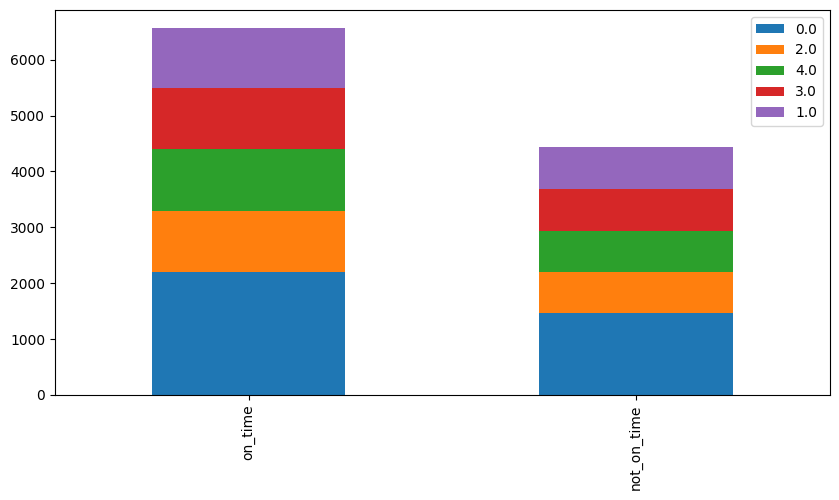

In [120]:
bar_chart(data, 'Warehouse_block')

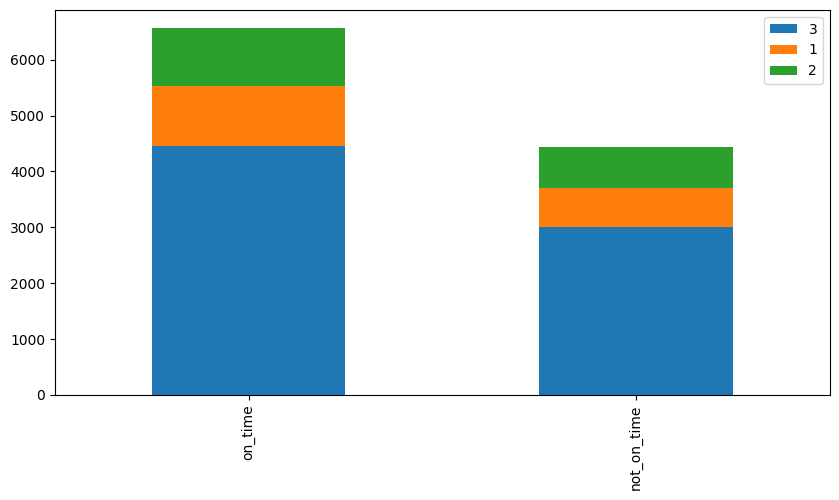

In [121]:
bar_chart(data, 'Mode_of_Shipment')

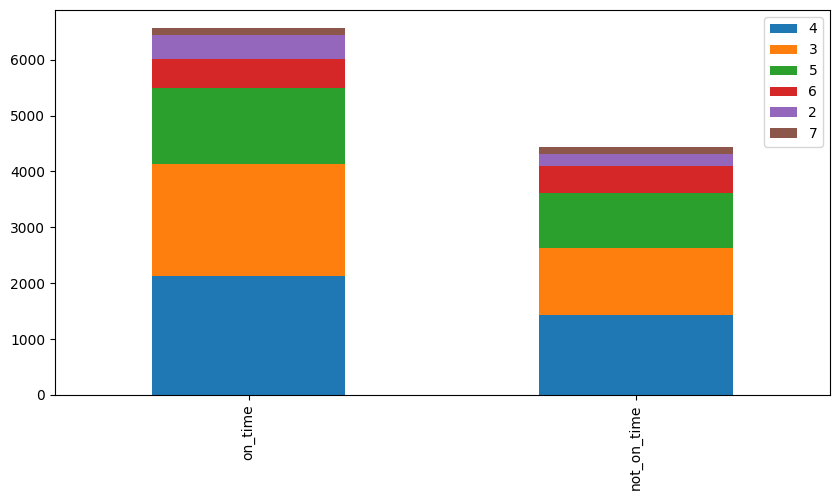

In [122]:
bar_chart(data, 'Customer_care_calls')

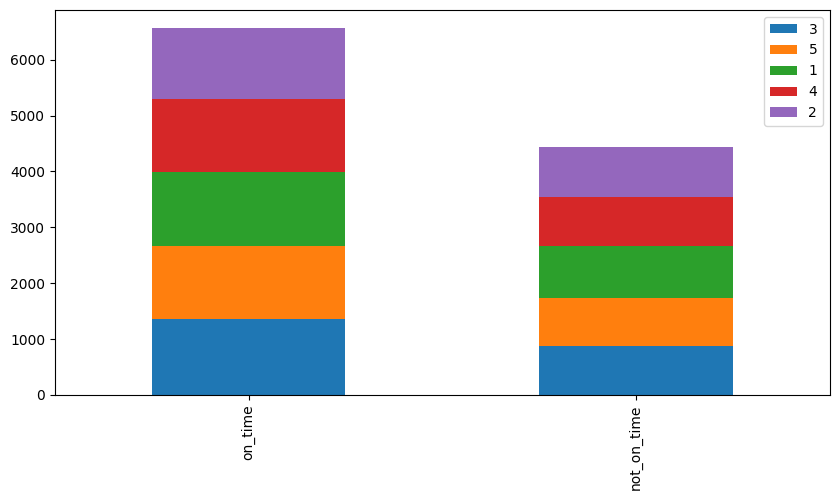

In [123]:
bar_chart(data, 'Customer_rating')

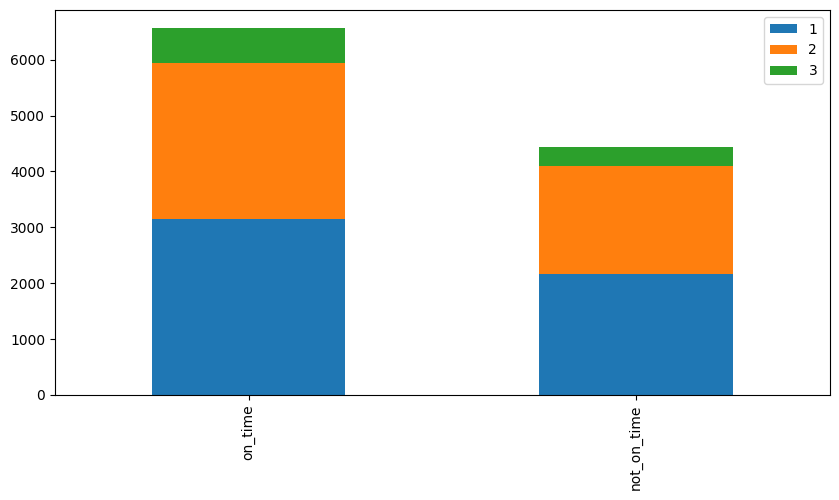

In [124]:
bar_chart(data, 'Product_importance')

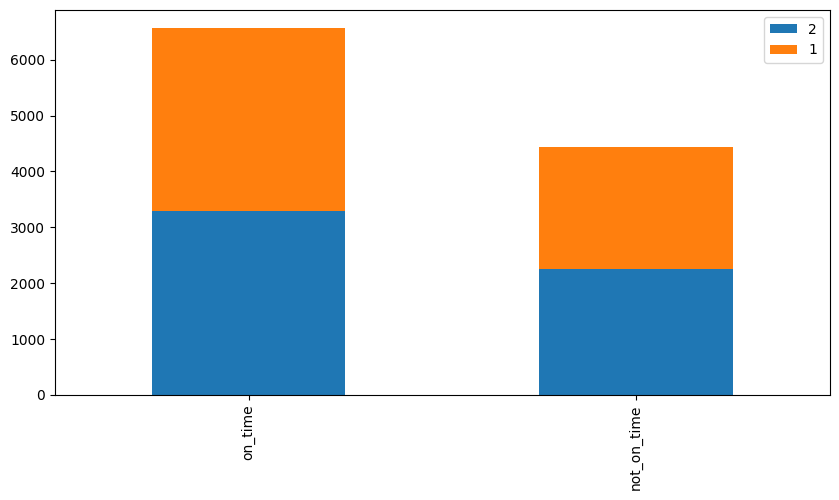

In [125]:
bar_chart(data, 'Gender')

In [128]:
from sklearn.ensemble import RandomForestClassifier

Features = ["Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Gender", "Discount_offered", "Weight_in_gms"]

Y = train["on_time"]
X = pd.get_dummies(train[Features])

#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model = SVC() 
#model = KNeighborsClassifier(n_neighbors = 13) 
model.fit(X, Y)

RandomForestClassifier(max_depth=5, random_state=1)

In [130]:
X_test = pd.get_dummies(test[Features]) 
X_test.count()
predictions = model.predict(X_test) 

In [131]:
predictions

array([1, 1, 1, ..., 0, 1, 0])

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(test["on_time"], predictions)

0.6827272727272727

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(test["on_time"], predictions)

In [136]:
print(report)

              precision    recall  f1-score   support

           0       0.57      0.95      0.71       902
           1       0.94      0.49      0.65      1298

    accuracy                           0.68      2200
   macro avg       0.75      0.72      0.68      2200
weighted avg       0.79      0.68      0.67      2200



In [138]:
confmatrix=confusion_matrix(test["on_time"], predictions)
print(confmatrix)

[[860  42]
 [656 642]]


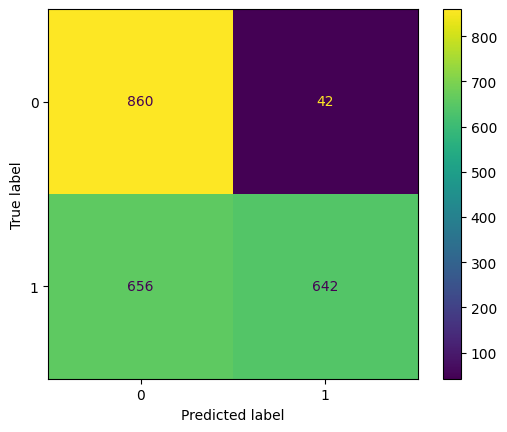

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, test["on_time"])